In [ ]:
# Importing necessary packages
#load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#load data
data = sns.load_dataset('iris')

X = data.iloc[:, :-1] # independent var i.e. X = data['sepal_length' 'sepal_width', 'petal_length', 'petal-width' ]
y = data.iloc[:, -1] # dependent var i.e. y = data['species']


In [ ]:
# split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [ ]:
# create adaboost classifier object
AdaModel = AdaBoostClassifier(n_estimators=100, learning_rate=1, algorithm='SAMME', random_state=99)

In [ ]:
# train adaboost classifier
model = AdaModel.fit(X_train, y_train)

In [ ]:
# predict the response for test dataset
y_pred = model.predict(X_test)

In [ ]:
# model accuracy, how correct is the classifier?
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


#full code

In [ ]:
# Importing necessary packages
#load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#load data
data = sns.load_dataset('iris')

X = data.iloc[:, :-1] # independent var i.e. X = data['sepal_length' 'sepal_width', 'petal_length', 'petal-width' ]
y = data.iloc[:, -1] # dependent var i.e. y = data['species']

# split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# create adaboost classifier object
AdaModel = AdaBoostClassifier(n_estimators=100, learning_rate=1, algorithm='SAMME', random_state=99)

# train adaboost classifier
model = AdaModel.fit(X_train, y_train)

# predict the response for test dataset
y_pred = model.predict(X_test)

# model accuracy, how correct is the classifier?
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9333333333333333


<ipython-input-5-997949ab8e74>:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot1.set_xticklabels(range(0,450,50))


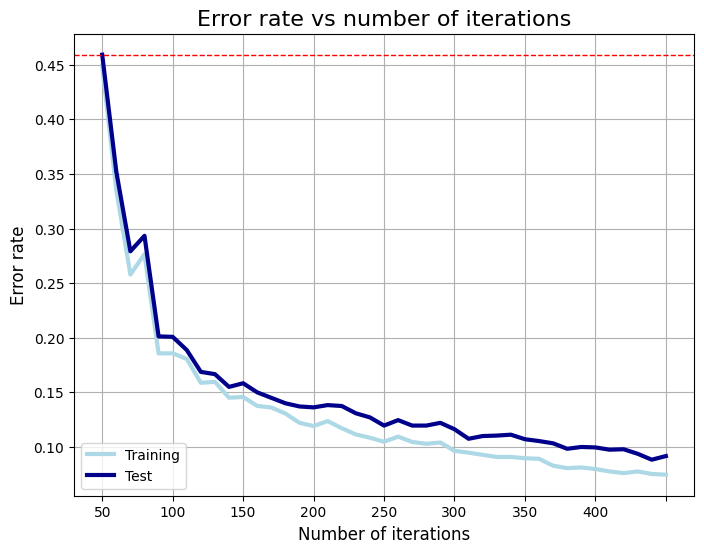

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
# import train test split
from sklearn.model_selection import train_test_split
# import cross_Validation
from sklearn.model_selection import cross_val_score
# import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_hastie_10_2
import matplotlib.pyplot as plt

""" HELPER FUNCTION: GET ERROR RATE ========================================="""
def get_error_rate(pred, Y):
    return sum(pred != Y) / float(len(Y))

""" HELPER FUNCTION: PRINT ERROR RATE ======================================="""
def print_error_rate(err):
    print ('Error rate: Training: %.4f - Test: %.4f' % err)

""" HELPER FUNCTION: GENERIC CLASSIFIER ====================================="""
def generic_clf(Y_train, X_train, Y_test, X_test, clf):
    clf.fit(X_train,Y_train)
    pred_train = clf.predict(X_train)
    pred_test = clf.predict(X_test)
    return get_error_rate(pred_train, Y_train), \
           get_error_rate(pred_test, Y_test)

""" ADABOOST IMPLEMENTATION ================================================="""
def adaboost_clf(Y_train, X_train, Y_test, X_test, M, clf):
    n_train, n_test = len(X_train), len(X_test)
    # Initialize weights
    w = np.ones(n_train) / n_train
    pred_train, pred_test = [np.zeros(n_train), np.zeros(n_test)]

    for i in range(M):
        # Fit a classifier with the specific weights
        clf.fit(X_train, Y_train, sample_weight = w)
        pred_train_i = clf.predict(X_train)
        pred_test_i = clf.predict(X_test)
        # Indicator function
        miss = [int(x) for x in (pred_train_i != Y_train)]
        # Equivalent with 1/-1 to update weights
        miss2 = [x if x==1 else -1 for x in miss]
        # Error
        err_m = np.dot(w,miss) / sum(w)
        # Alpha
        alpha_m = 0.5 * np.log( (1 - err_m) / float(err_m))
        # New weights
        w = np.multiply(w, np.exp([float(x) * alpha_m for x in miss2]))
        # Add to prediction
        pred_train = [sum(x) for x in zip(pred_train,
                                          [x * alpha_m for x in pred_train_i])]
        pred_test = [sum(x) for x in zip(pred_test,
                                         [x * alpha_m for x in pred_test_i])]

    pred_train, pred_test = np.sign(pred_train), np.sign(pred_test)
    # Return error rate in train and test set
    return get_error_rate(pred_train, Y_train), \
           get_error_rate(pred_test, Y_test)

""" PLOT FUNCTION ==========================================================="""
def plot_error_rate(er_train, er_test):
    df_error = pd.DataFrame([er_train, er_test]).T
    df_error.columns = ['Training', 'Test']
    plot1 = df_error.plot(linewidth = 3, figsize = (8,6),
            color = ['lightblue', 'darkblue'], grid = True)
    plot1.set_xlabel('Number of iterations', fontsize = 12)
    plot1.set_xticklabels(range(0,450,50))
    plot1.set_ylabel('Error rate', fontsize = 12)
    plot1.set_title('Error rate vs number of iterations', fontsize = 16)
    plt.axhline(y=er_test[0], linewidth=1, color = 'red', ls = 'dashed')

""" MAIN SCRIPT ============================================================="""
if __name__ == '__main__':

    # Read data
    x, y = make_hastie_10_2()
    df = pd.DataFrame(x)
    df['Y'] = y

    # Split into training and test set
    train, test = train_test_split(df, test_size = 0.2)
    X_train, Y_train = train.iloc[:,:-1], train.iloc[:,-1]
    X_test, Y_test = test.iloc[:,:-1], test.iloc[:,-1]

    # Fit a simple decision tree first
    clf_tree = DecisionTreeClassifier(max_depth = 1, random_state = 1)
    er_tree = generic_clf(Y_train, X_train, Y_test, X_test, clf_tree)

    # Fit Adaboost classifier using a decision tree as base estimator
    # Test with different number of iterations
    er_train, er_test = [er_tree[0]], [er_tree[1]]
    x_range = range(10, 410, 10)
    for i in x_range:
        er_i = adaboost_clf(Y_train, X_train, Y_test, X_test, i, clf_tree)
        er_train.append(er_i[0])
        er_test.append(er_i[1])

    # Compare error rate vs number of iterations
    plot_error_rate(er_train, er_test)

- AdaBoost is an acronym for Adaptive boost
- Adaboost is a boosting method
- It uses the complete dataset to train the weak learners
- Weak learners are decision trees with max depth of 1, and because they have max depth of 1 they are only trained based on 1 feature of the dataset and thus they have low accuracy.
- Decision tree is a supervised machine learning algorithm and it is also a binary classification method in which the dataset is divided into half based on certain rules it infers from the features of the dataset.
- AdaBoost is a sequential process where each subsequent model tries to correct the errors of the previous model.
- The succeeding models are dependent on the previous model.
- Each model is trained on the same dataset but each sample have different weights
based on the previous model's success and error.
- The weights are re-assigned in each iteration to build a strong classifier that learns from the mistakes of the previous weak learners in the ensemble.
- The weights for mispredicted samples are increased so that the weak learner stresses on their prediction.

working of adaboost:
- first a subset is selected from the original dataset.
- initially, all points/ training examples are given the same weights.
- a base model is trained on this subset.
- this model is used to make prediction on all dataset
- errors are calculated using actual values and predicted values
- for the next round/stage, th misclassified examples are assigned higher weights
- furthermore, the correctly classified examples are assigned lower weights.
- in the next round this new dataset is given to another weak learner model to make prediction on this dataset.
- this model then focuses more on the training examples that have the largest weights.
- that means this model tries to correct the errors from the previous model.
- Similarly, multiple models are built and each model corrects the errors of the previous model.
- the final model is the weighted mean of all the models.

so, the adaboost algorithm combine a number of weak learners

Thus, each model boosts the performance of the ensemble.

Adaboost is a very powerful ensemble method in which each subsequent model tries to correct the errors of the previous model. We can use AdaBoost to decrease bias. But, AdaBoost is ineffective in reducing model variance.



In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [26]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.shape

(150, 5)

data preprepossing

In [27]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [28]:
X.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [29]:
y.head(2)

,species
0,setosa
1,setosa


In [9]:
X.values

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [30]:
X = X.values
y = y.values

In [12]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [31]:
y

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()

In [32]:
y = le.fit_transform(y)

In [33]:
y # setosa -> 0, versicolor -> 1, virginica -> 2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=99)

biuld decision tree model

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
tree = DecisionTreeClassifier(max_depth=1, random_state=42)

In [52]:
tree

DecisionTreeClassifier(max_depth=1, random_state=42)

In [35]:
tree = tree.fit(X_train, y_train)

In [36]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score

In [37]:
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)

In [38]:
print(f'Decision Tree accuracy\nTrain: {tree_train}\nTest: {tree_test}\n')

Decision Tree accuracy
Train: 0.6666666666666666
Test: 0.6666666666666666



implementing adaboost

In [39]:
from sklearn.ensemble import AdaBoostClassifier

In [43]:
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42, algorithm='SAMME')

In [44]:
ada = ada.fit(X_train, y_train)

In [45]:
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

In [46]:
ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)

In [47]:
print(f'Adaboost accuracy\nTrain: {ada_train}\nTest: {ada_test}\n')

Adaboost accuracy
Train: 1.0
Test: 0.9333333333333333



full code

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = sns.load_dataset('iris')
df.head()

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X = X.values
y = y.values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y # setosa -> 0, versicolor -> 1, virginica -> 2

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=9)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=1, random_state=42)
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

from sklearn.metrics import accuracy_score
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)

# print(f'Decision Tree accuracy\nTrain: {tree_train}\nTest: {tree_test}\n')

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42, algorithm='SAMME')
ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)
ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
print(f'Decision Tree accuracy\nTrain: {tree_train}\nTest: {tree_test}\n')
print(f'Adaboost accuracy\nTrain: {ada_train}\nTest: {ada_test}\n')


percentage_increase = ((ada_train - tree_train) / tree_train) * 100
print(f'Percentage Increase in Training Accuracy: {percentage_increase:.2f}%')
percentage_increase = ((ada_test - tree_test) / tree_test) * 100
print(f'Percentage Increase in testing Accuracy: {percentage_increase:.2f}%')


Decision Tree accuracy
Train: 0.6666666666666666
Test: 0.6666666666666666

Adaboost accuracy
Train: 1.0
Test: 0.9666666666666667

Percentage Increase in Training Accuracy: 50.00%
Percentage Increase in testing Accuracy: 45.00%
